In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DATA_DIR = 'Data/'
IMG_SIZE = 150
BATCH_SIZE = 10
EPOCHS = 10

In [3]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [4]:
train_gen = datagen.flow_from_directory(DATA_DIR, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, class_mode='binary', subset='training')

Found 2332 images belonging to 2 classes.


In [5]:
validation_gen = datagen.flow_from_directory(DATA_DIR, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, class_mode='binary', subset='validation')

Found 582 images belonging to 2 classes.


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(IMG_SIZE,IMG_SIZE,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer='adam', metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 256)       2

In [9]:
history = model.fit(train_gen, epochs=EPOCHS, validation_data=validation_gen)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 234 steps, validate for 59 steps
Epoch 1/10
234/234 [==============================] - 118s 505ms/step - loss: 0.6367 - accuracy: 0.6389 - val_loss: 0.4962 - val_accuracy: 0.7732
Epoch 2/10
234/234 [==============================] - 107s 459ms/step - loss: 0.5162 - accuracy: 0.7590 - val_loss: 0.4427 - val_accuracy: 0.8213
Epoch 3/10
234/234 [==============================] - 110s 472ms/step - loss: 0.4680 - accuracy: 0.7804 - val_loss: 0.4526 - val_accuracy: 0.8213
Epoch 4/10
234/234 [==============================] - 127s 541ms/step - loss: 0.4286 - accuracy: 0.8075 - val_loss: 0.3666 - val_accuracy: 0.8574
Epoch 5/10
234/234 [==============================] - 102s 436ms/step - loss: 0.3817 - accuracy: 0.8323 - val_loss: 0.3377 - val_accuracy: 0.8574
Epoch 6/10
234/234 [==============================] - 97s 416ms/step - loss: 0.3598 - accuracy: 0.8482 - val_loss: 0.3888 - val_accuracy: 0.8282
Epoch 7/10
234/234 [============

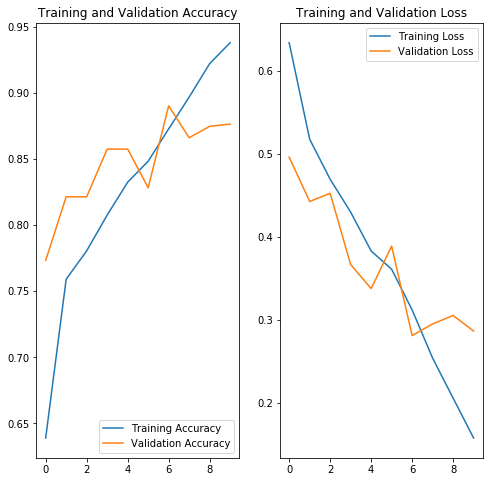

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [17]:
test_gen = test_datagen.flow_from_directory('test/', target_size=(IMG_SIZE,IMG_SIZE), batch_size=7, class_mode='binary')

Found 7 images belonging to 1 classes.


In [18]:
def get_label_name(x):
    if x == 0:
        return 'Hot Dog'
    else:
        return 'Not Hot Dog'

In [1]:
batch_holder = np.zeros((7, IMG_SIZE, IMG_SIZE, 3))
img_dir='test/New Folder'
for i, img in enumerate(os.listdir(img_dir)):
  img = tf.keras.preprocessing.image.load_img(os.path.join(img_dir,img), target_size=(IMG_SIZE,IMG_SIZE))
  img = tf.keras.preprocessing.image.img_to_array(img)
  img  = img / 255.
  batch_holder[i, :] = img

result=model.predict_classes(batch_holder)
 
fig = plt.figure(figsize=(20, 20))
 
for i,img in enumerate(batch_holder):
  fig.add_subplot(4,5, i+1)
  plt.title(get_label_name(result[i][0]))
  plt.imshow(img/255.)
  
plt.show()

NameError: name 'np' is not defined